In [1]:
import dalex as dx
import pandas as pd
import pickle
import xgboost as xgb

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# XGBoost

In [2]:
input_df = pd.read_csv('../data/preprocessed_dataset.csv')
y = input_df.loc[:,'Attrition']
X = input_df.drop('Attrition', axis='columns')

xgboost = pickle.load(open("xgb_model.p", "rb" ))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14) 
# musimy podzielić z takim seedem, bo tak był wytrenowany

In [4]:
conf_m = confusion_matrix(y_test, xgboost.predict(X_test))
pd.DataFrame(conf_m)

,0,1
0,355,61
1,35,2081


In [5]:
tn, fn, fp, tp = conf_m.ravel()
print("TNR: {:.1f}%".format(tn/(tn + fn) * 100))
print("TPR: {:.1f}%".format(tp/(tp + fp) * 100))

TNR: 85.3%
TPR: 98.3%


In [6]:
roc_auc_score(y_test, xgboost.predict(X_test))

0.9184123709466336

# LogisticRegression

In [7]:
logreg = pickle.load(open("logreg_model", "rb" ))

In [8]:
conf_m = confusion_matrix(y_test, logreg.predict(X_test))
pd.DataFrame(conf_m)

,0,1
0,140,276
1,38,2078


In [9]:
tn, fn, fp, tp = conf_m.ravel()
print("TNR: {:.1f}%".format(tn/(tn + fn) * 100))
print("TPR: {:.1f}%".format(tp/(tp + fp) * 100))

TNR: 33.7%
TPR: 98.2%


In [10]:
roc_auc_score(y_test, logreg.predict(X_test))

0.6592900247200815

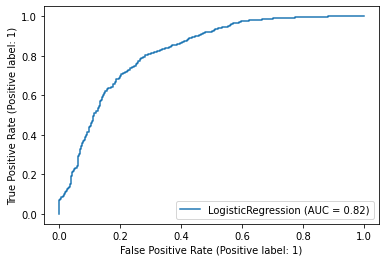

In [11]:
from sklearn import metrics
metrics.plot_roc_curve(logreg, X_test, y_test)  
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

# Random Forest

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=14)

random_forest = pickle.load(open("random_forest_model.p", "rb" ))

/home/sawcio/Studia/4sem/Warsztaty_badawcze/wb-env/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/sawcio/Studia/4sem/Warsztaty_badawcze/wb-env/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [13]:
conf_m = confusion_matrix(y_test, random_forest.predict(X_test))
pd.DataFrame(conf_m)

,0,1
0,165,391
1,7,2779


In [14]:
tn, fn, fp, tp = conf_m.ravel()
print("TNR: {:.1f}%".format(tn/(tn + fn) * 100))
print("TPR: {:.1f}%".format(tp/(tp + fp) * 100))

TNR: 29.7%
TPR: 99.7%


# K-Neighbors

In [15]:
k_neighbor = pickle.load(open("k_neighbors_model.p", "rb" ))

/home/sawcio/Studia/4sem/Warsztaty_badawcze/wb-env/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [16]:
conf_m = confusion_matrix(y_test, k_neighbor.predict(X_test))
pd.DataFrame(conf_m)

,0,1
0,342,214
1,220,2566


In [17]:
tn, fn, fp, tp = conf_m.ravel()
print("TNR: {:.1f}%".format(tn/(tn + fn) * 100))
print("TPR: {:.1f}%".format(tp/(tp + fp) * 100))

TNR: 61.5%
TPR: 92.1%


Czyli ten model słabo radzi sobie na tej czesci zbioru, którą chcemy przewidywać, czyli na tych, którzy opuszczają bank.

Nie jest to dziwne, bo ten zbior jest niezbalansowany i większa grupa ciągnie w swoją stronę.

# K-Neighbors, different treshhold
Poprawia bias nieproporcjonalności w kolumnie celu

In [18]:
y_train.mean()

0.8421518054532056

In [19]:
y_pred = (k_neighbor.predict_proba(X_test)[:,1] > y_train.mean()).astype(int)

In [20]:
conf_m = confusion_matrix(y_test, y_pred)
pd.DataFrame(conf_m)

,0,1
0,445,111
1,963,1823


In [21]:
tn, fn, fp, tp = conf_m.ravel()
print("TNR: {:.1f}%".format(tn/(tn + fn) * 100))
print("TPR: {:.1f}%".format(tp/(tp + fp) * 100))

TNR: 80.0%
TPR: 65.4%
